The dataset consists of the following columns:

Name: Unique identifier for each automobile.

MPG: Fuel efficiency measured in miles per gallon.

Cylinders: Number of cylinders in the engine.

Displacement: Engine displacement, indicating its size or capacity.

Horsepower: Power output of the engine.

Weight: Weight of the automobile.

Acceleration: Capability to increase speed, measured in seconds.

Model Year: Year of manufacture for the automobile model.

Origin: Country or region of origin for each automobile.

In [1]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!kaggle datasets download -d tawfikelmetwally/automobile-dataset


  0%|          | 0.00/6.45k [00:00<?, ?B/s]
100%|██████████| 6.45k/6.45k [00:00<00:00, 141kB/s]


In [3]:
import pandas as pd

In [10]:
df=pd.read_csv("automobile-dataset.zip", compression="zip")
df


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [25]:
df.columns

Index(['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [13]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [14]:
df.isnull().any()

name            False
mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

In [15]:
df['horsepower'].isna().sum()

6

In [16]:
df[df['horsepower'].isna()]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,usa
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,usa
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,europe
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,usa
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,europe
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,usa


In [21]:
df.dropna(inplace=True)

In [22]:
df.isna().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [20]:
df[df.duplicated(subset=['name', 'mpg', 'model_year', 'origin'], keep = False)]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin


Data Analysis


In [24]:
df.dtypes        

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

Plot Automation

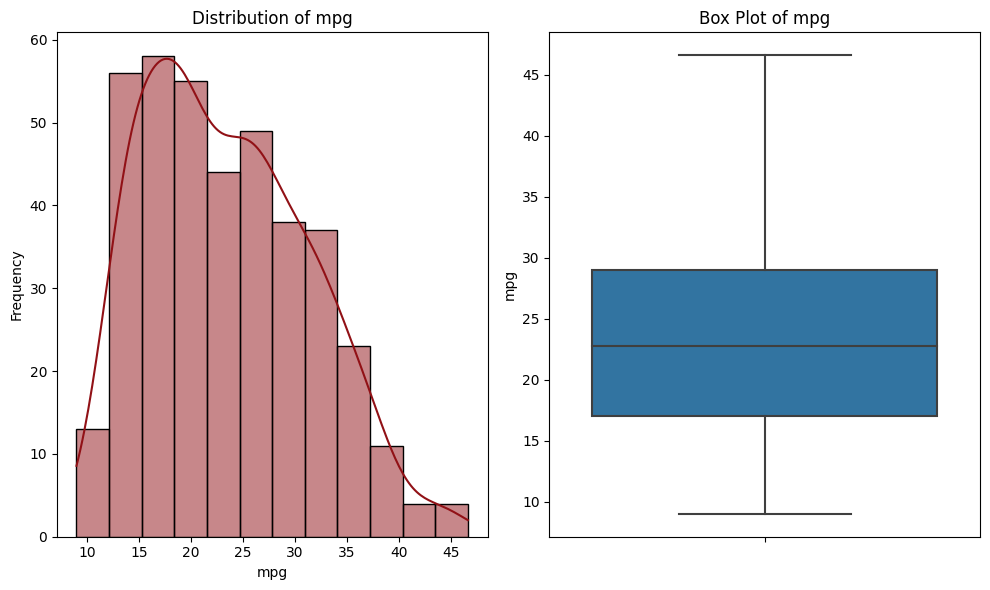

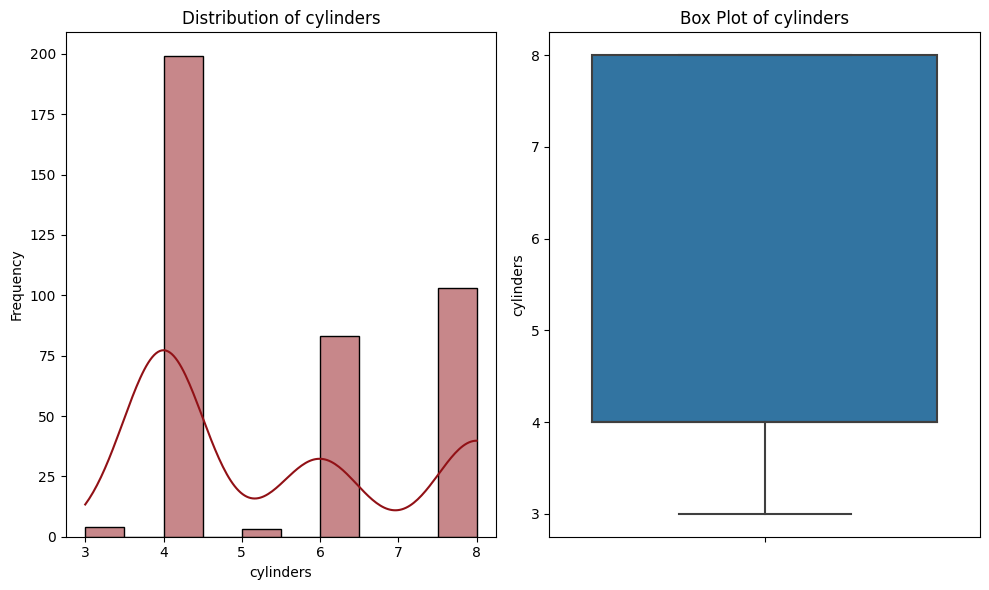

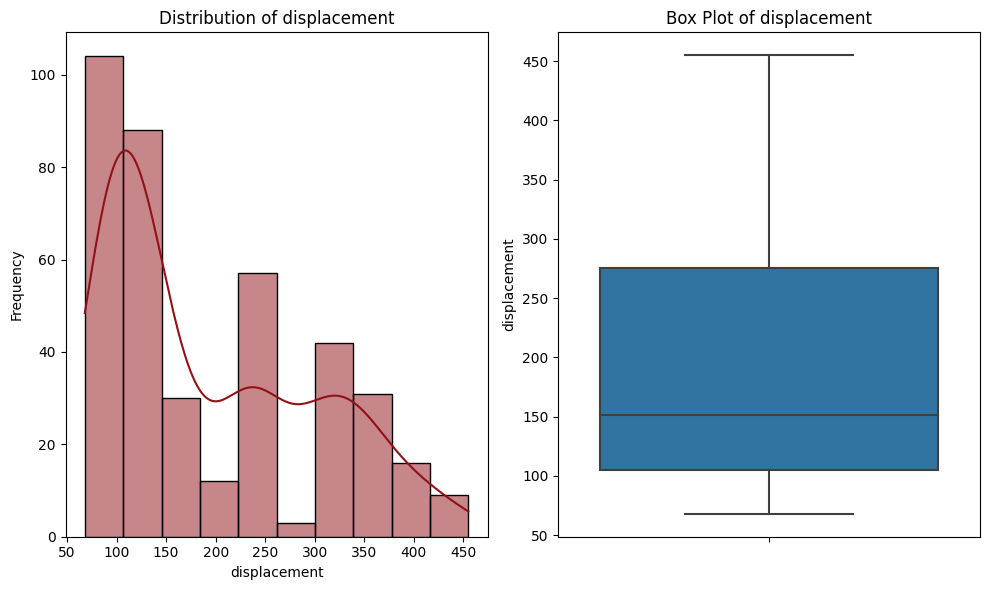

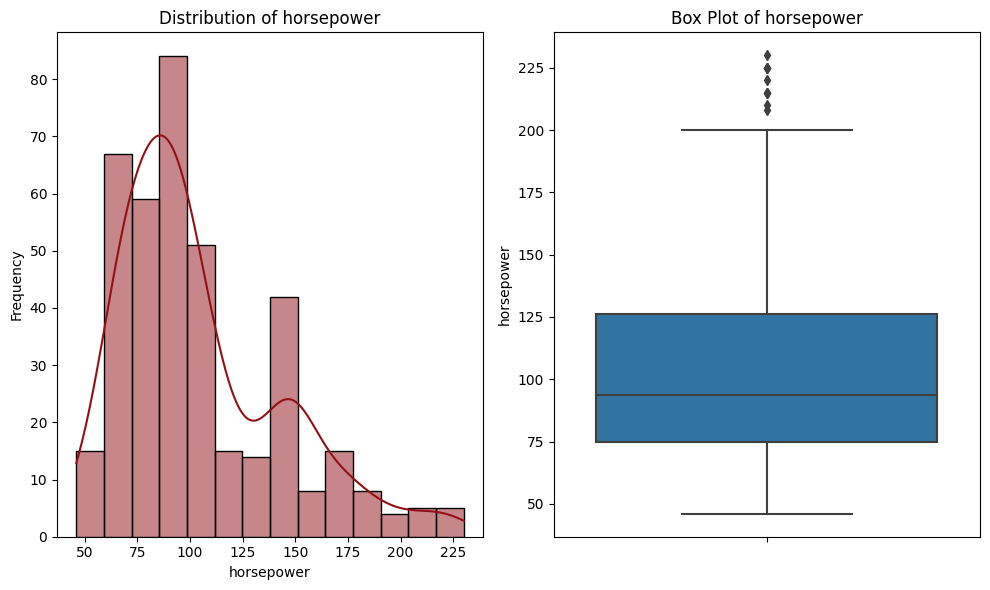

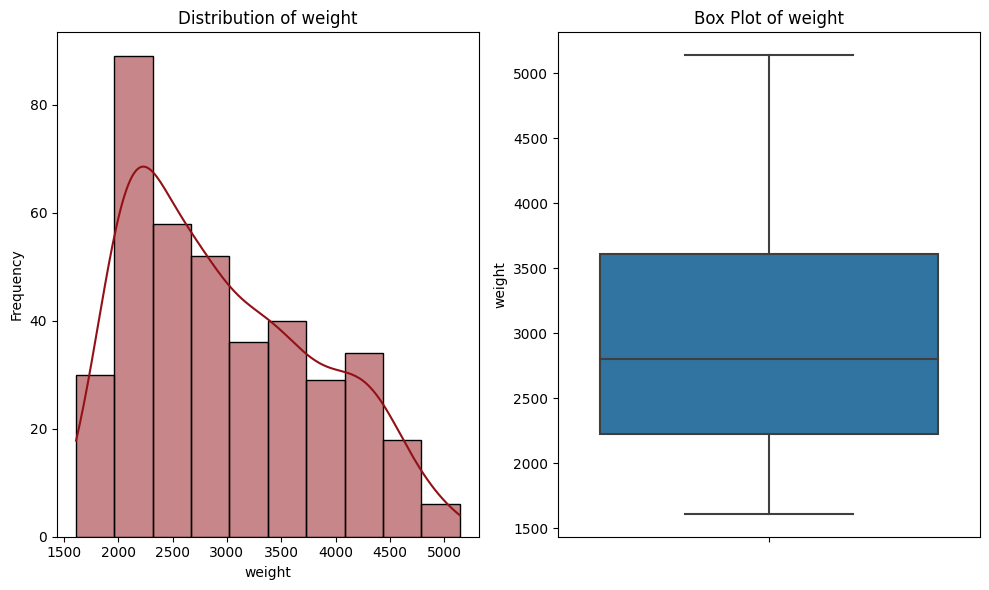

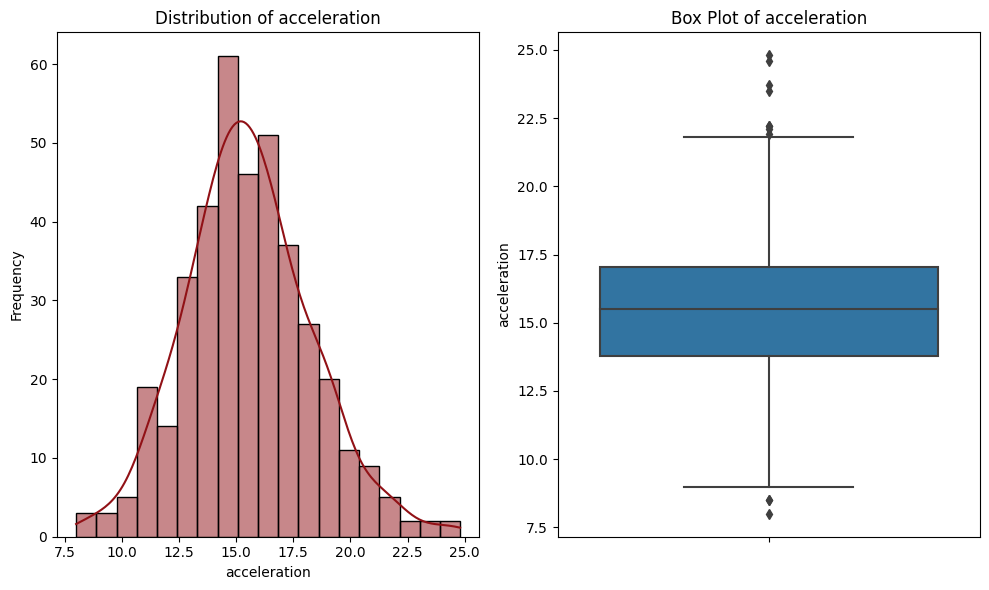

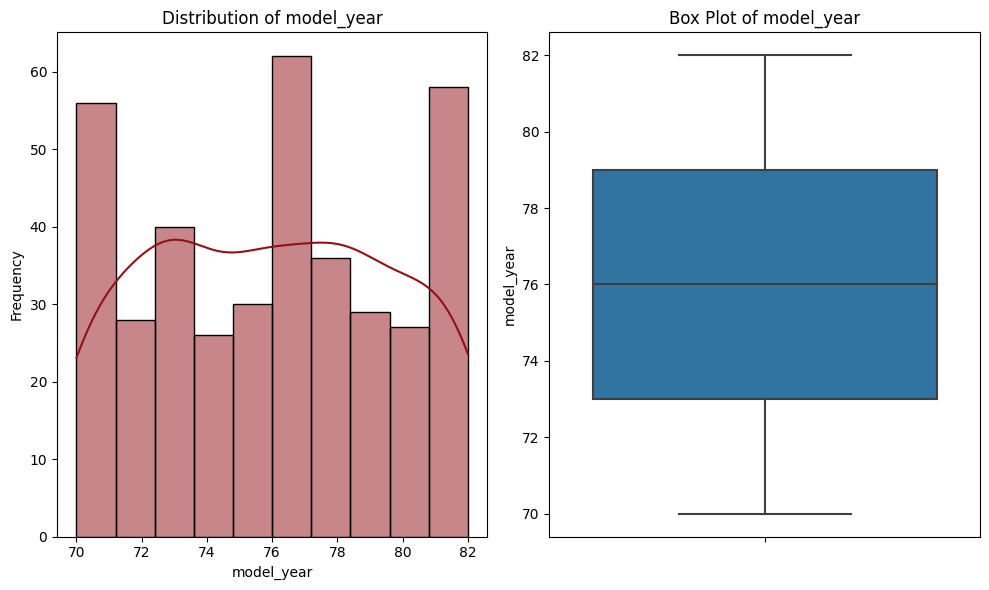

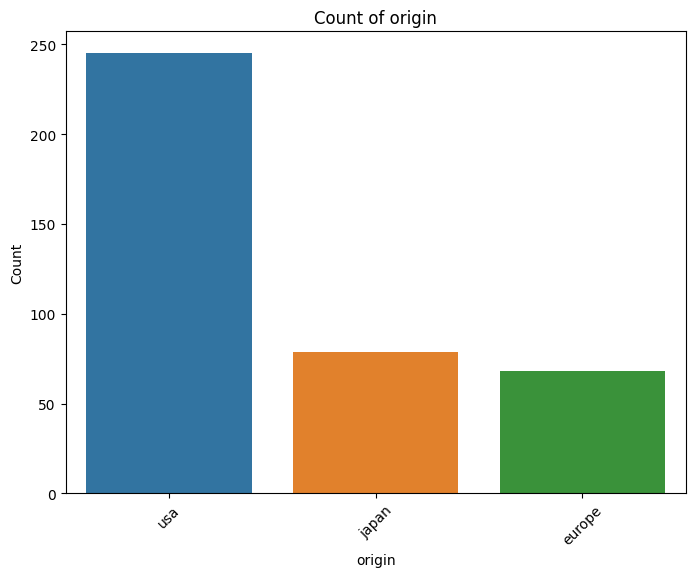

In [32]:
for column in df.columns:
    if column == 'name':
        continue  # Skip the name column
    if df[column].dtype == 'object':
        plt.figure(figsize=(8, 6))
        # Make a count plot with seaborn
        sns.countplot(data=df, x=column)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Count of {column}')
        plt.xticks(rotation = 45)
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        # Defining subplots in one row and two columns
        # In index one of the subplot, we will have histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=column, kde=True, color = '#911116', line_kws={'color': '#911156'})
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        # The second index subplot will have boxplots
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, y=column)
        plt.ylabel(column)
        plt.title(f'Box Plot of {column}')
        # To make sure that no overlapping 
        plt.tight_layout()
        plt.show()

Lets see the relationships between the quantitative variables

Scatter plots automation.

In [39]:
import warnings

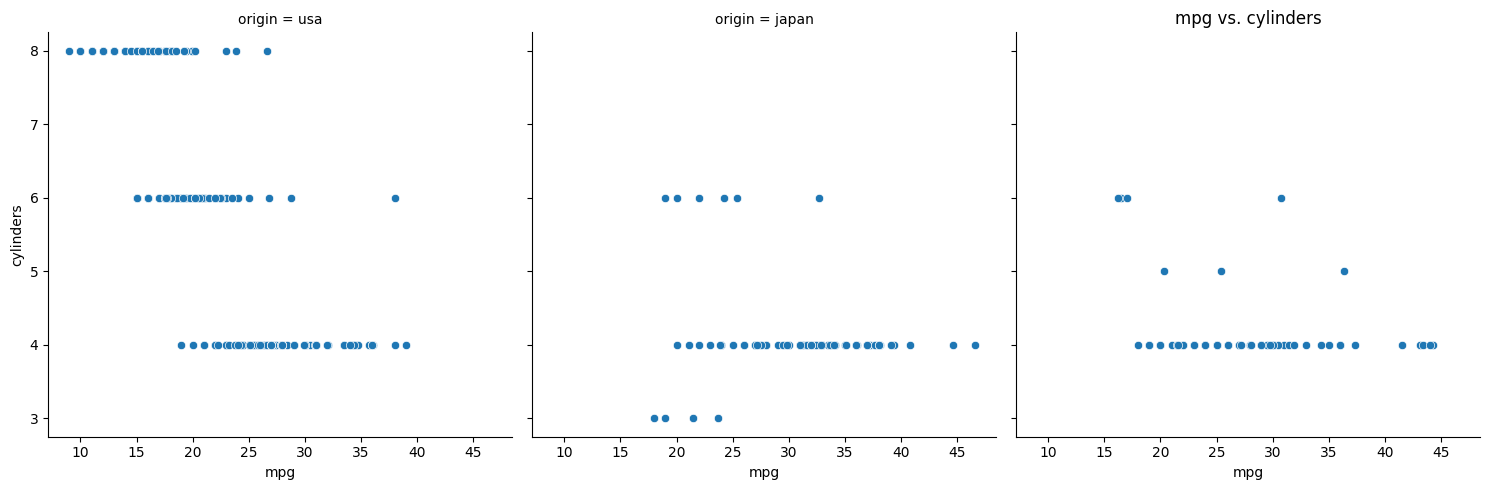

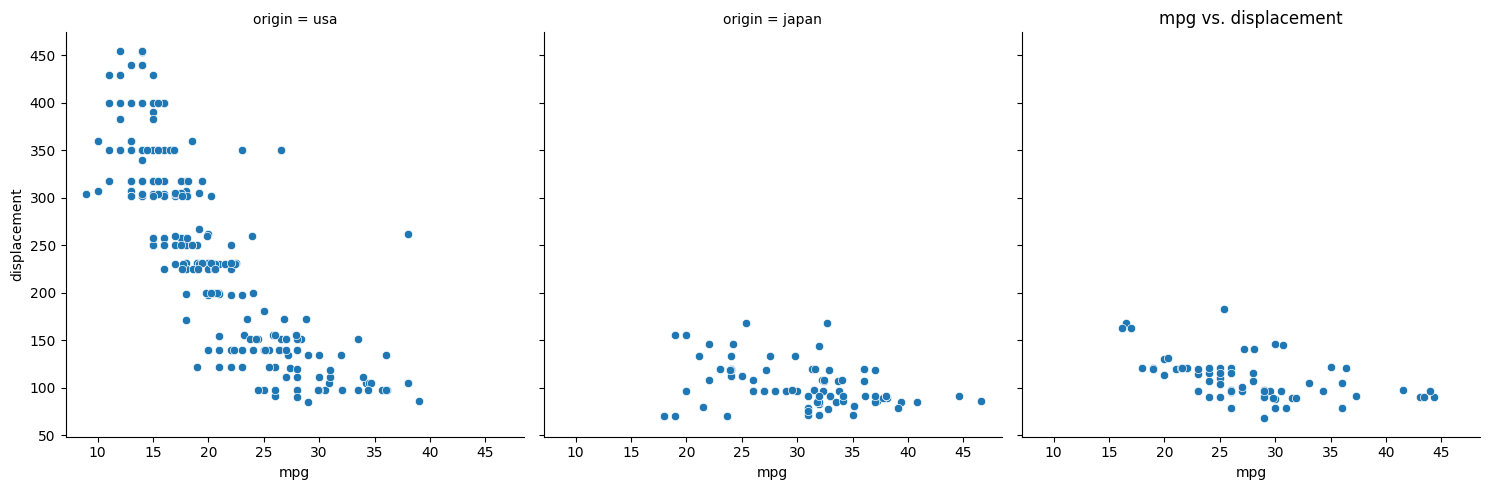

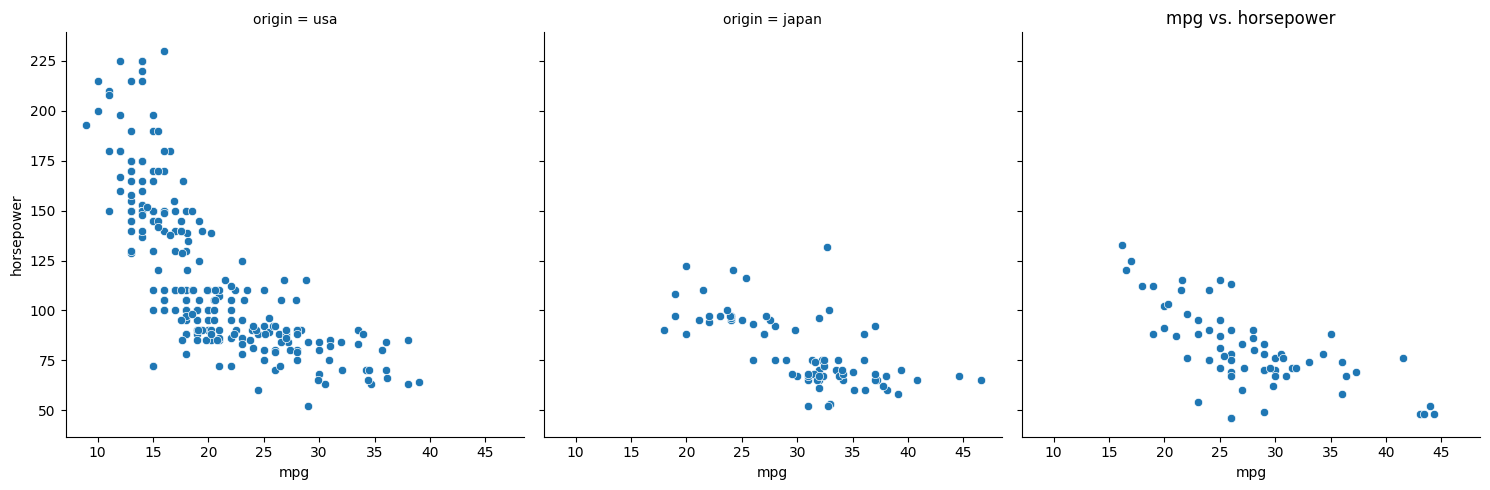

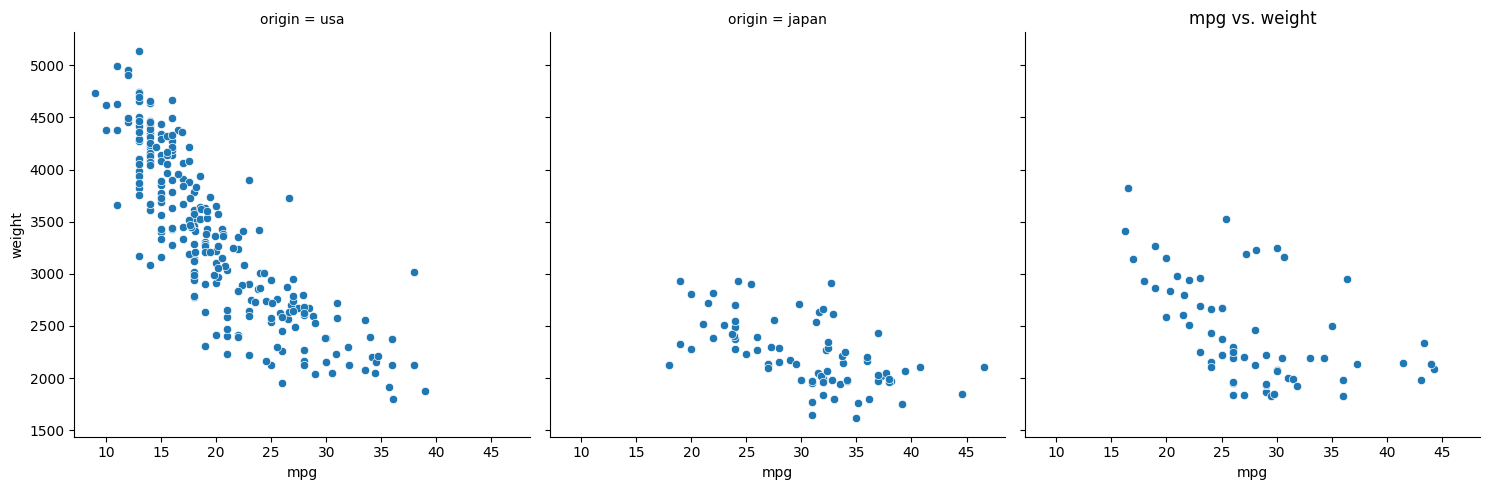

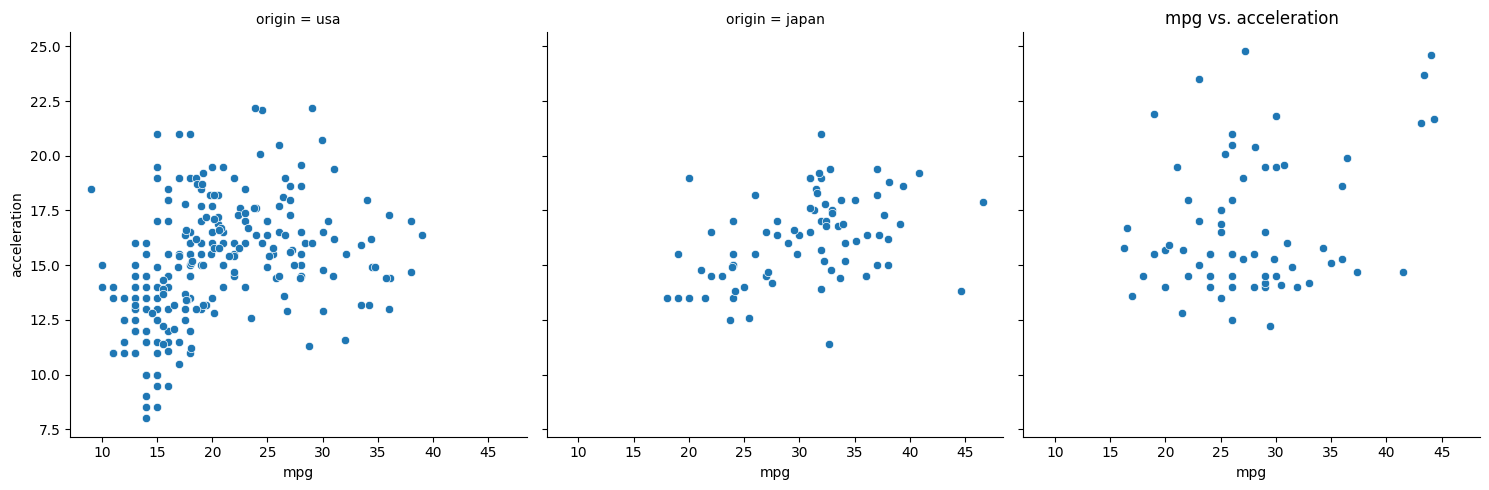

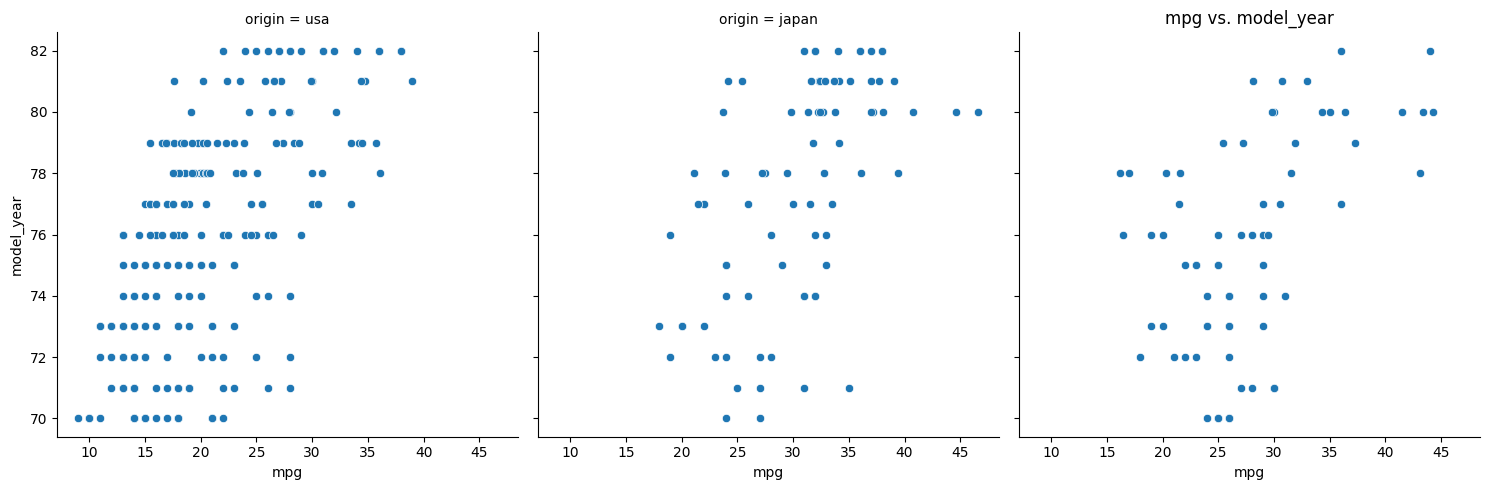

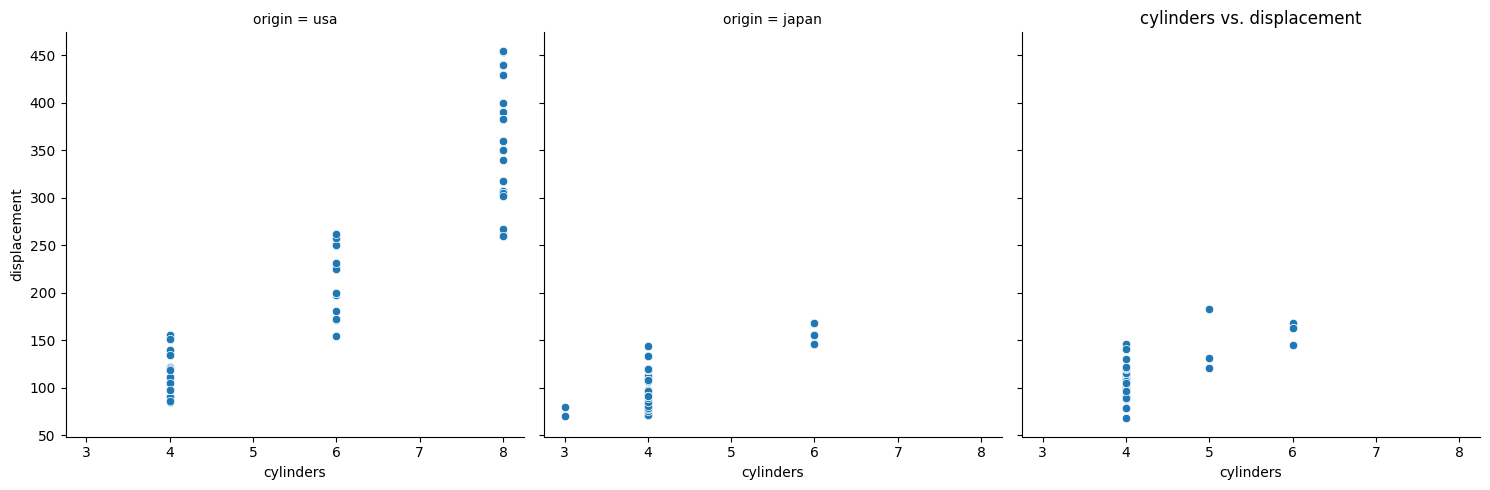

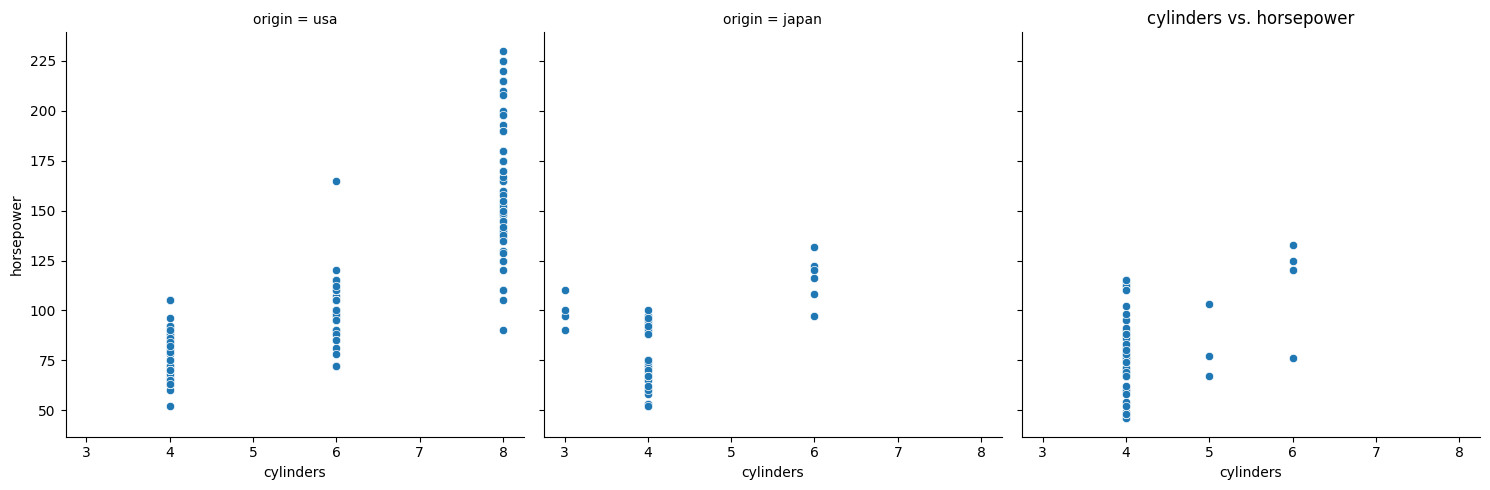

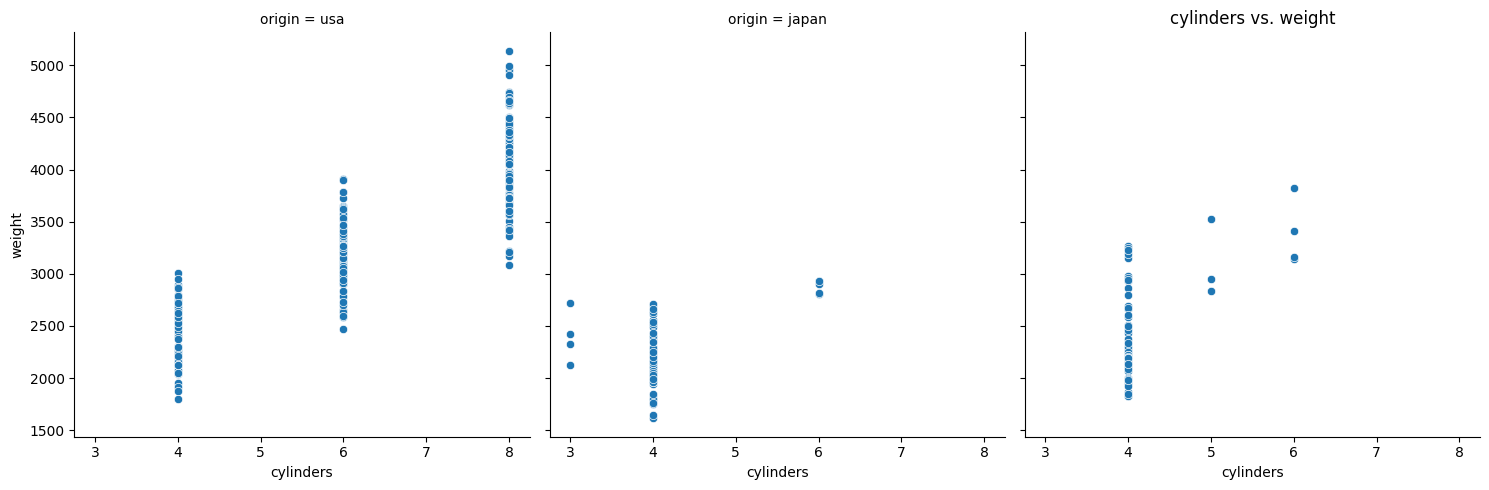

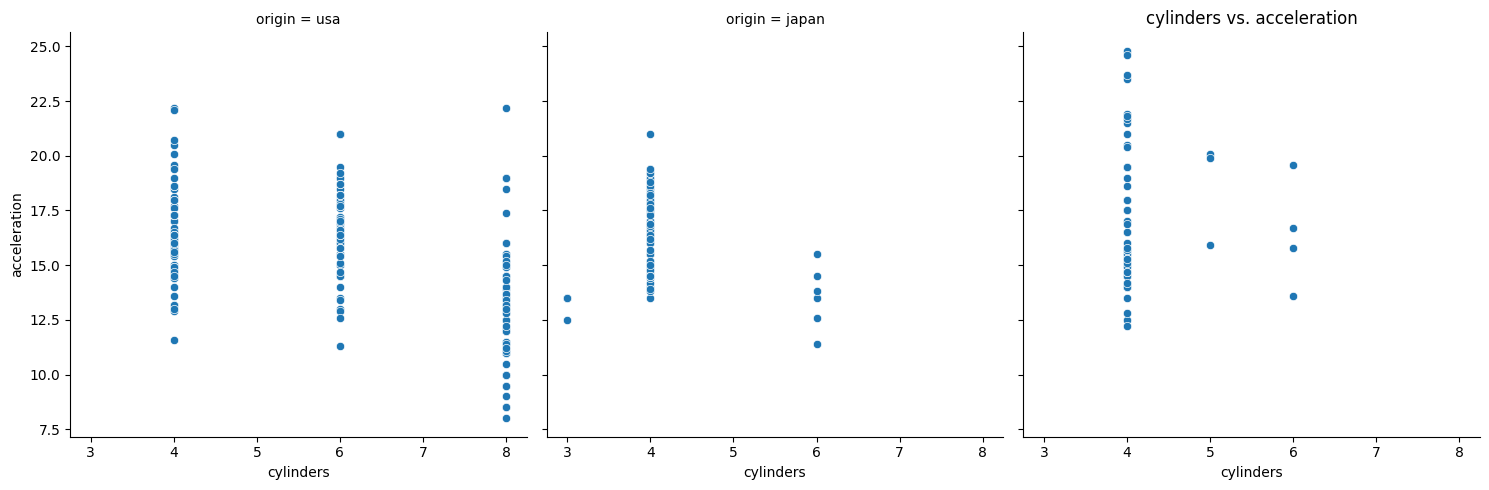

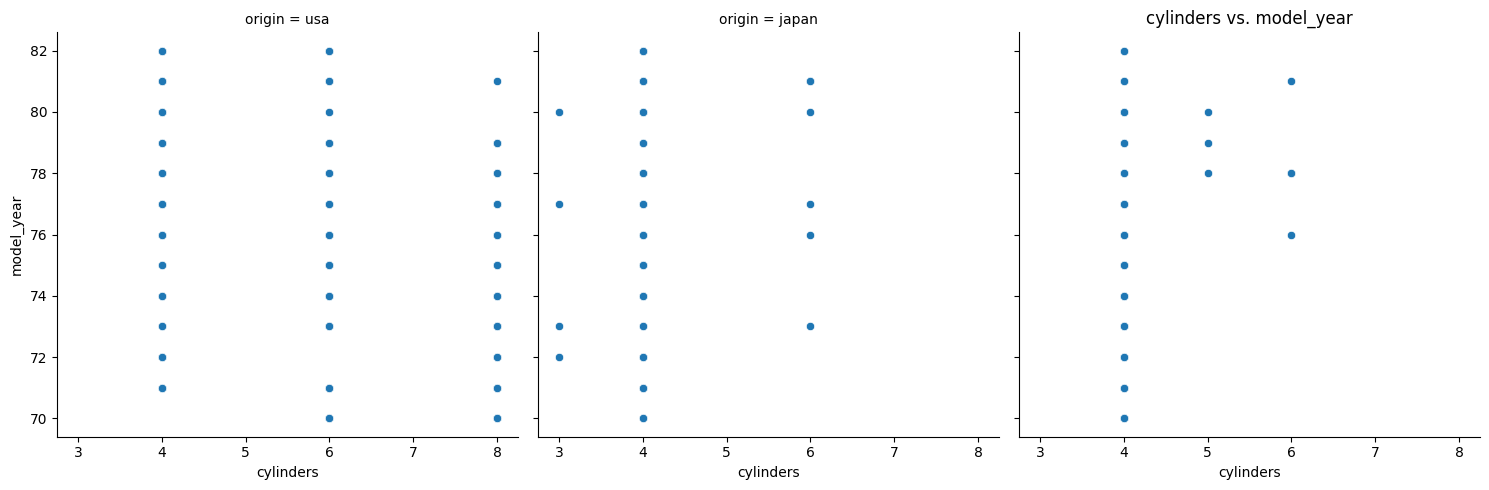

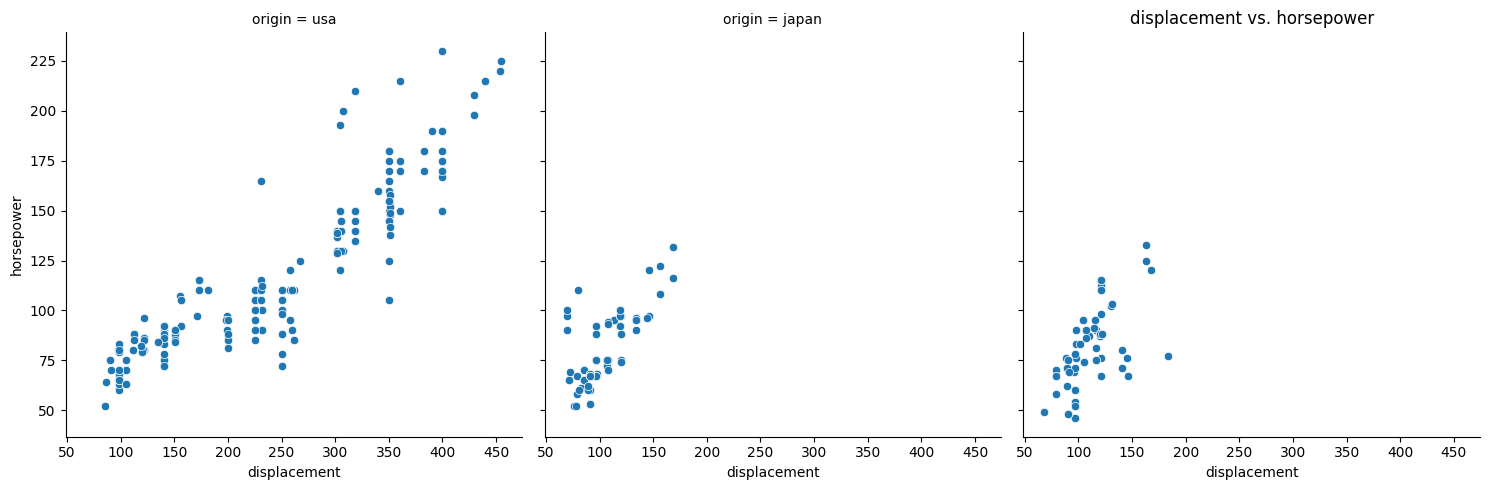

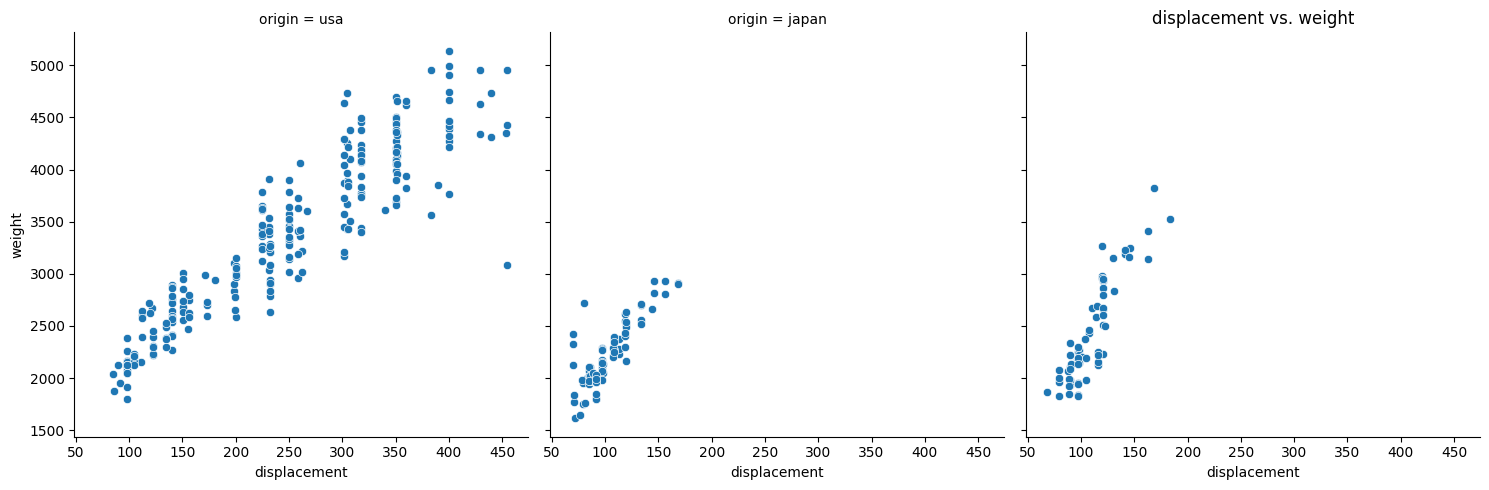

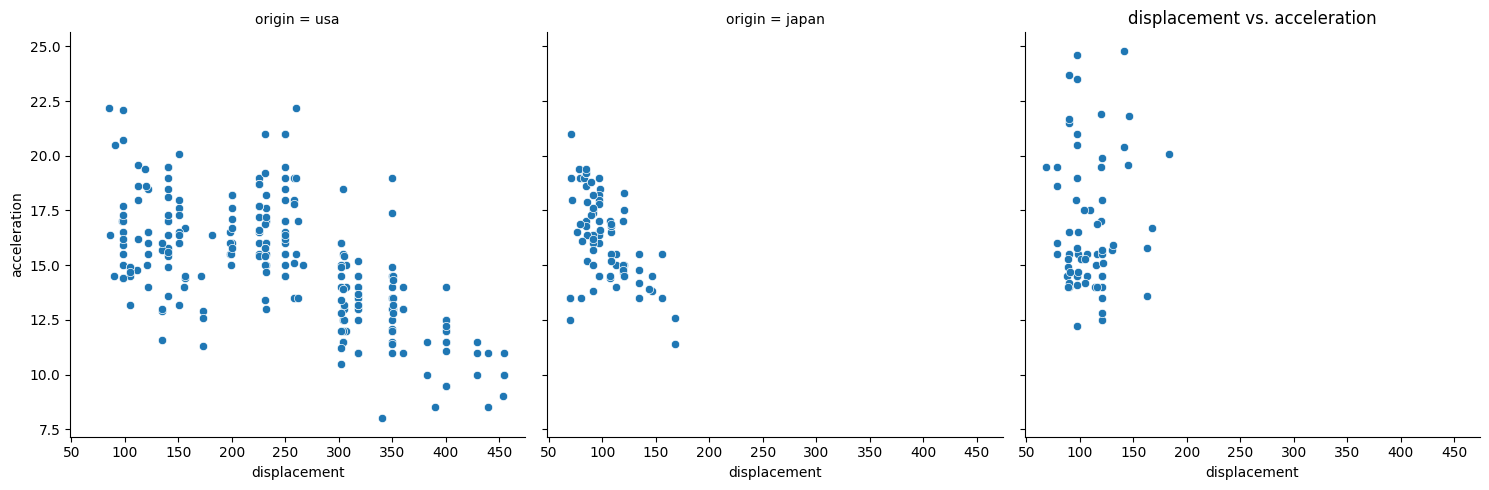

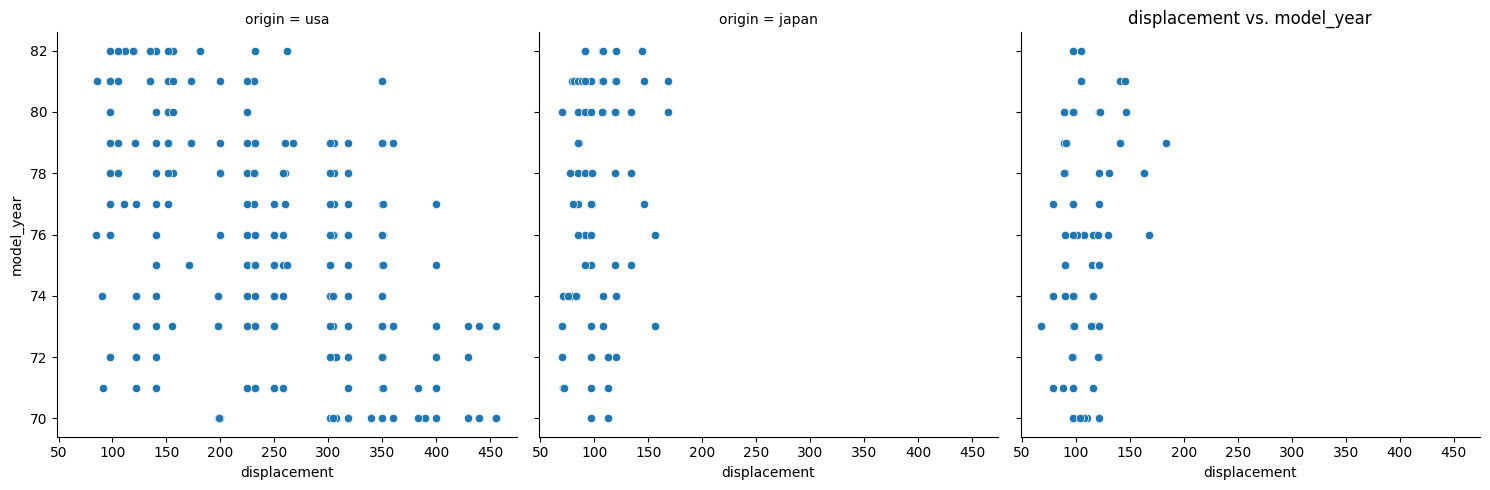

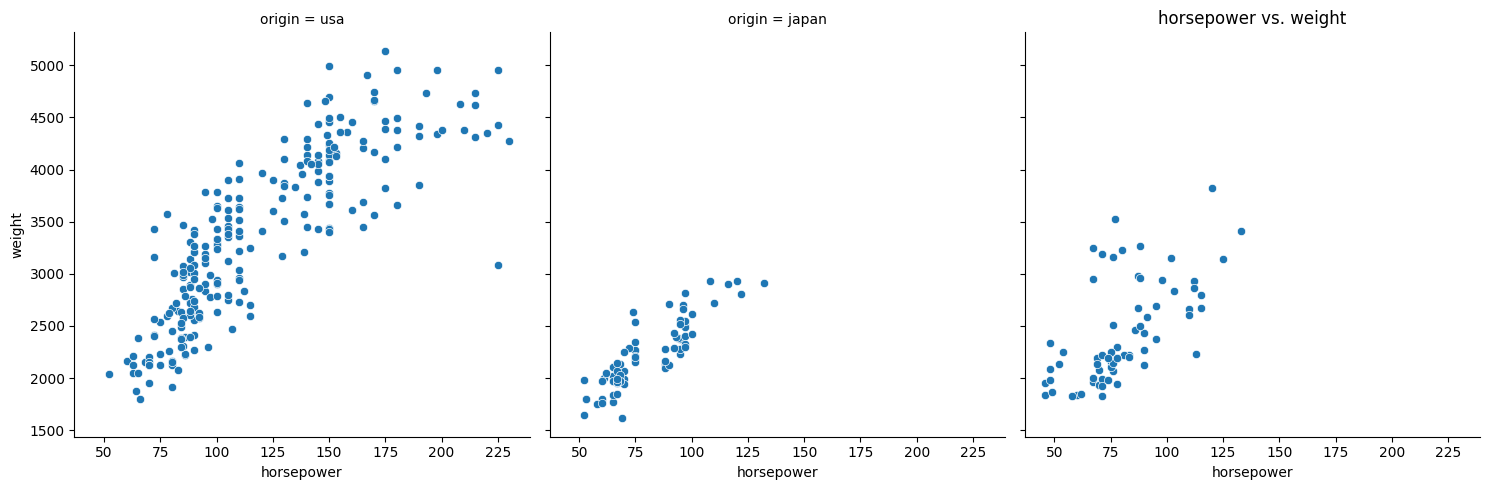

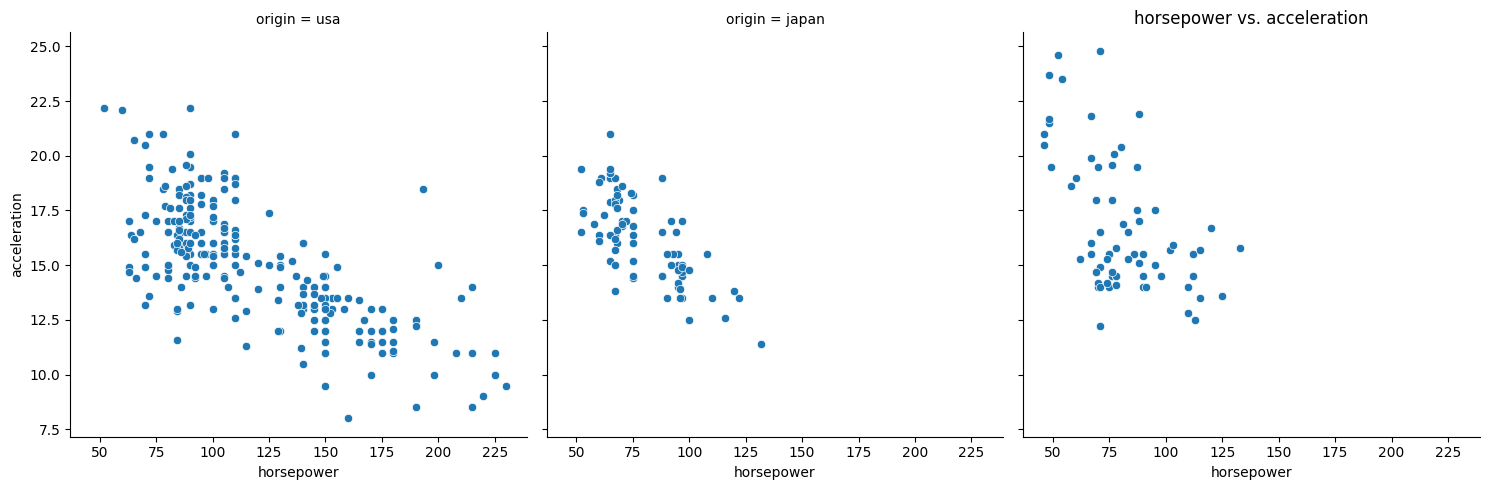

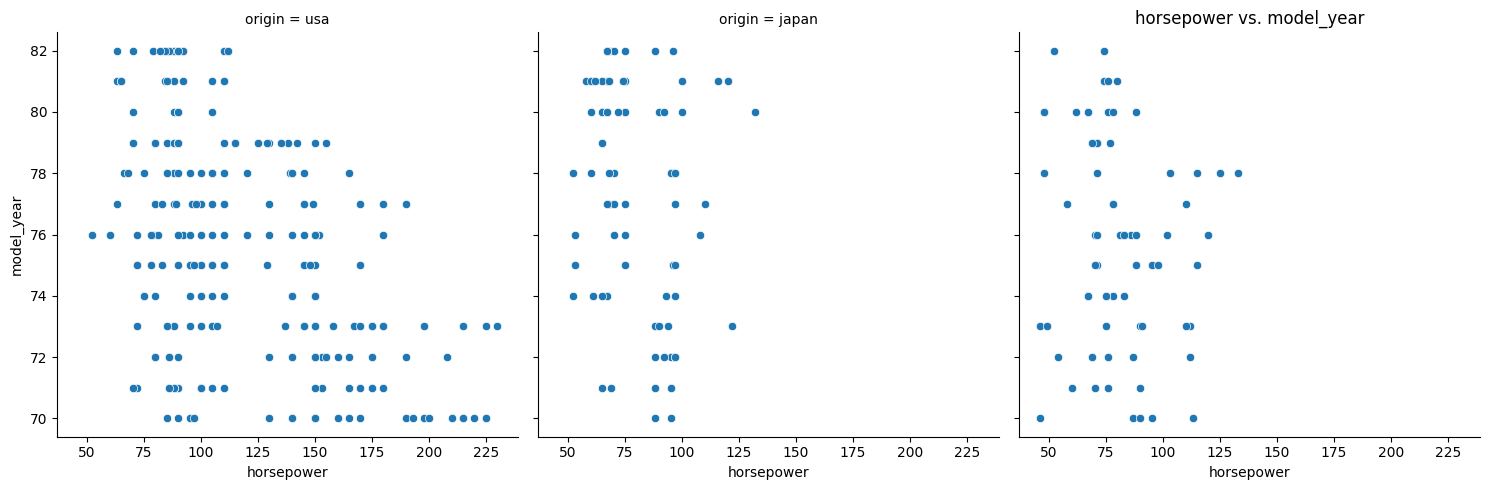

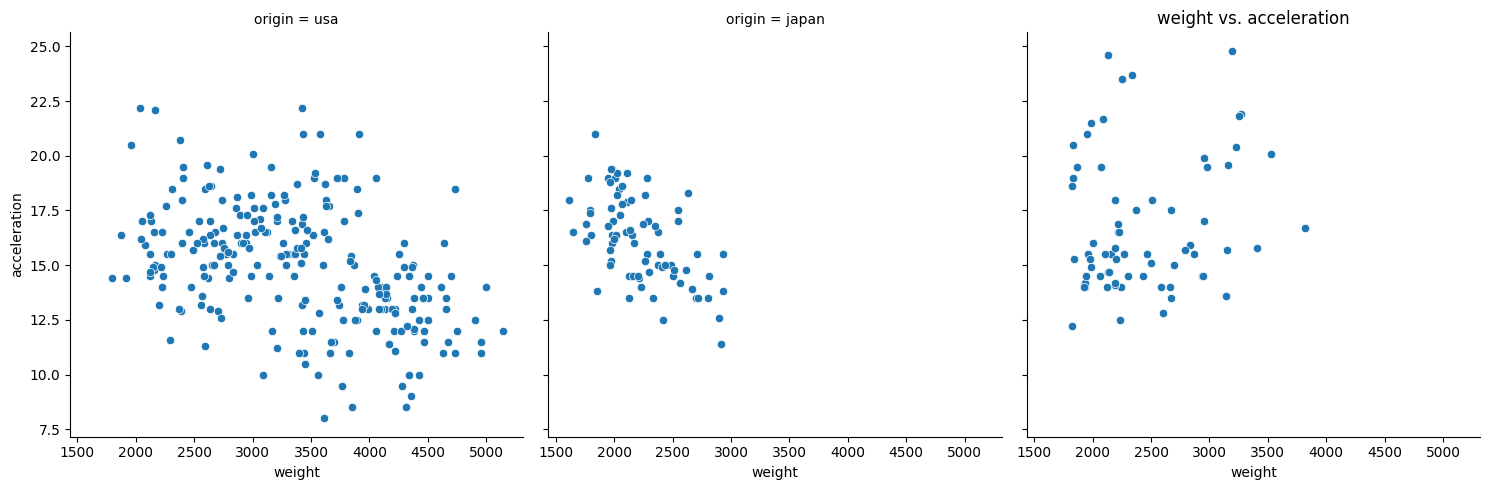

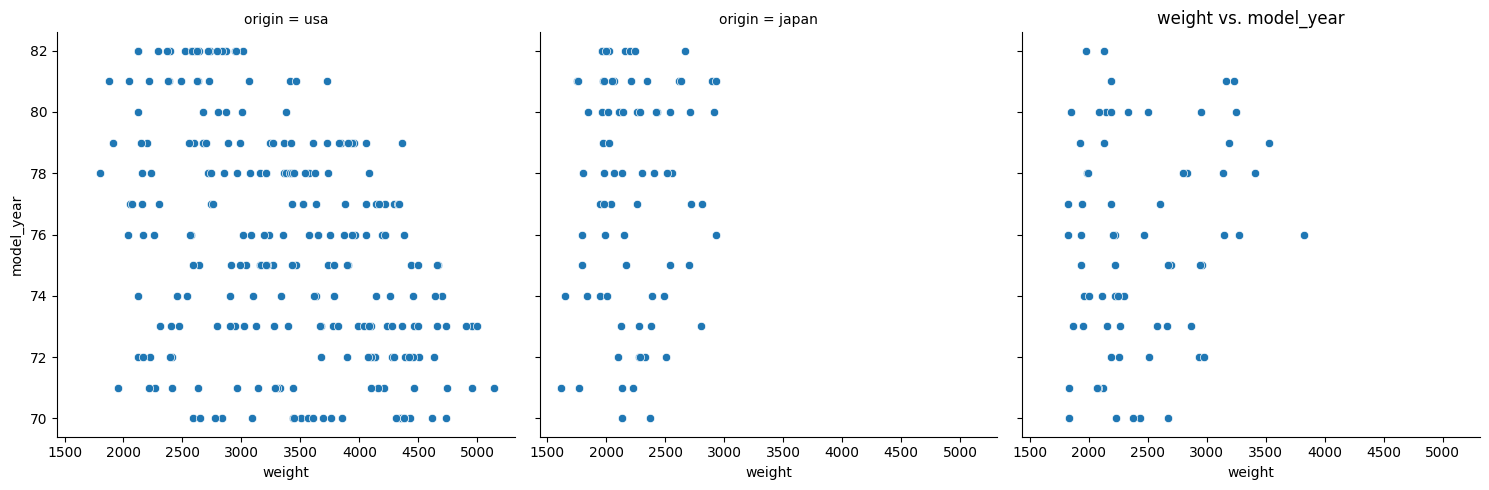

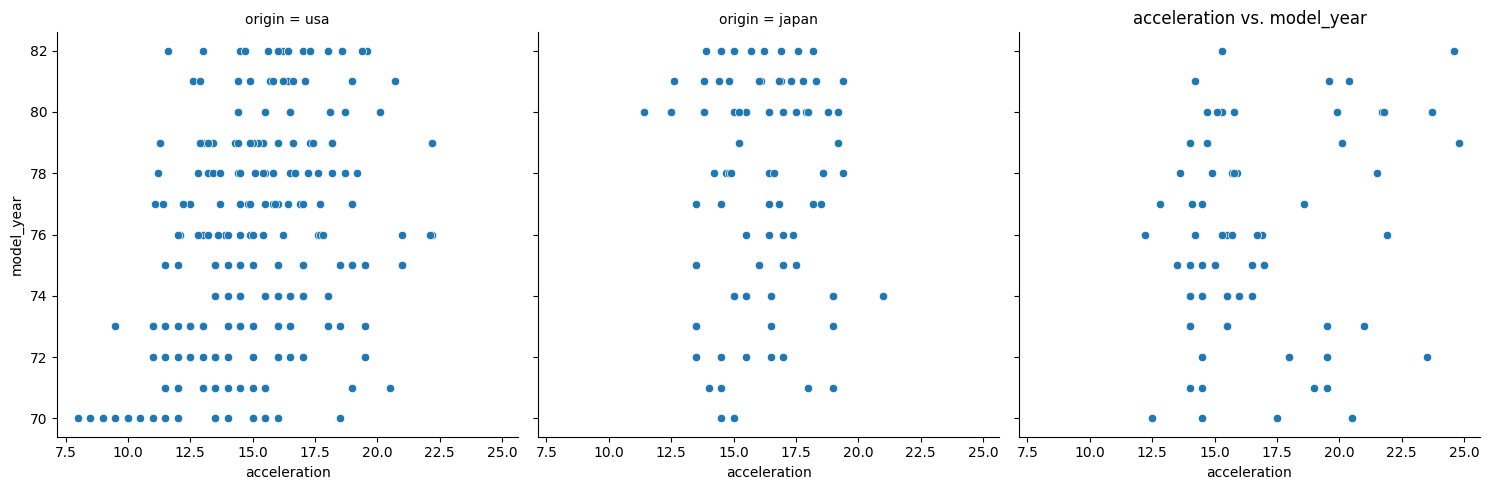

In [40]:
warnings.filterwarnings('ignore', category=UserWarning)
quantitative_variables = df.select_dtypes(include=['float64', 'int64']).columns

for i in range(len(quantitative_variables)):
    for j in range(i + 1, len(quantitative_variables)):
        sns.relplot(data=df, x=quantitative_variables[i], y=quantitative_variables[j], kind = 'scatter', col='origin')
        plt.xlabel(quantitative_variables[i])
        plt.ylabel(quantitative_variables[j])
        plt.title(f'{quantitative_variables[i]} vs. {quantitative_variables[j]}')
        plt.tight_layout()
        plt.show()

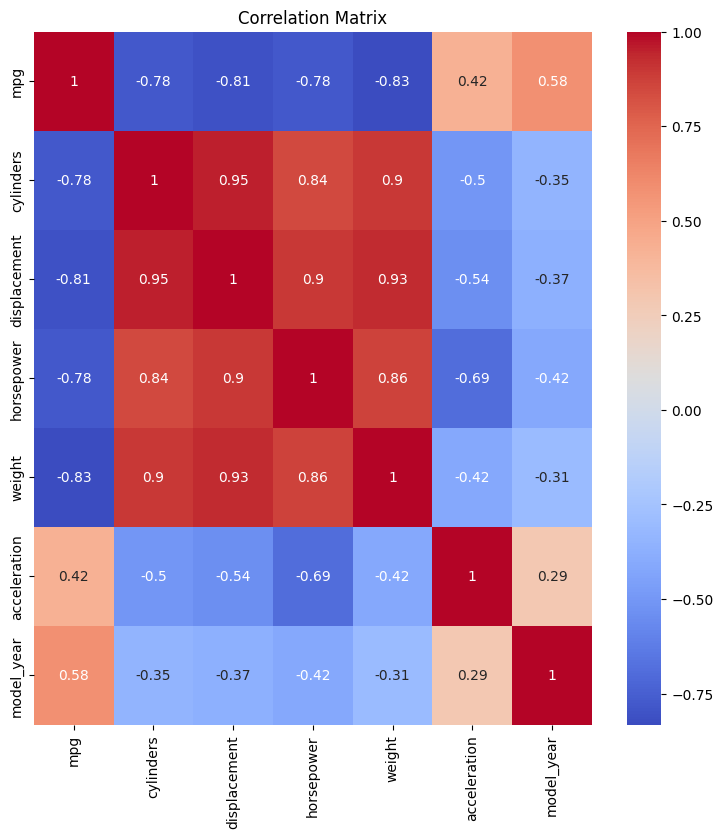

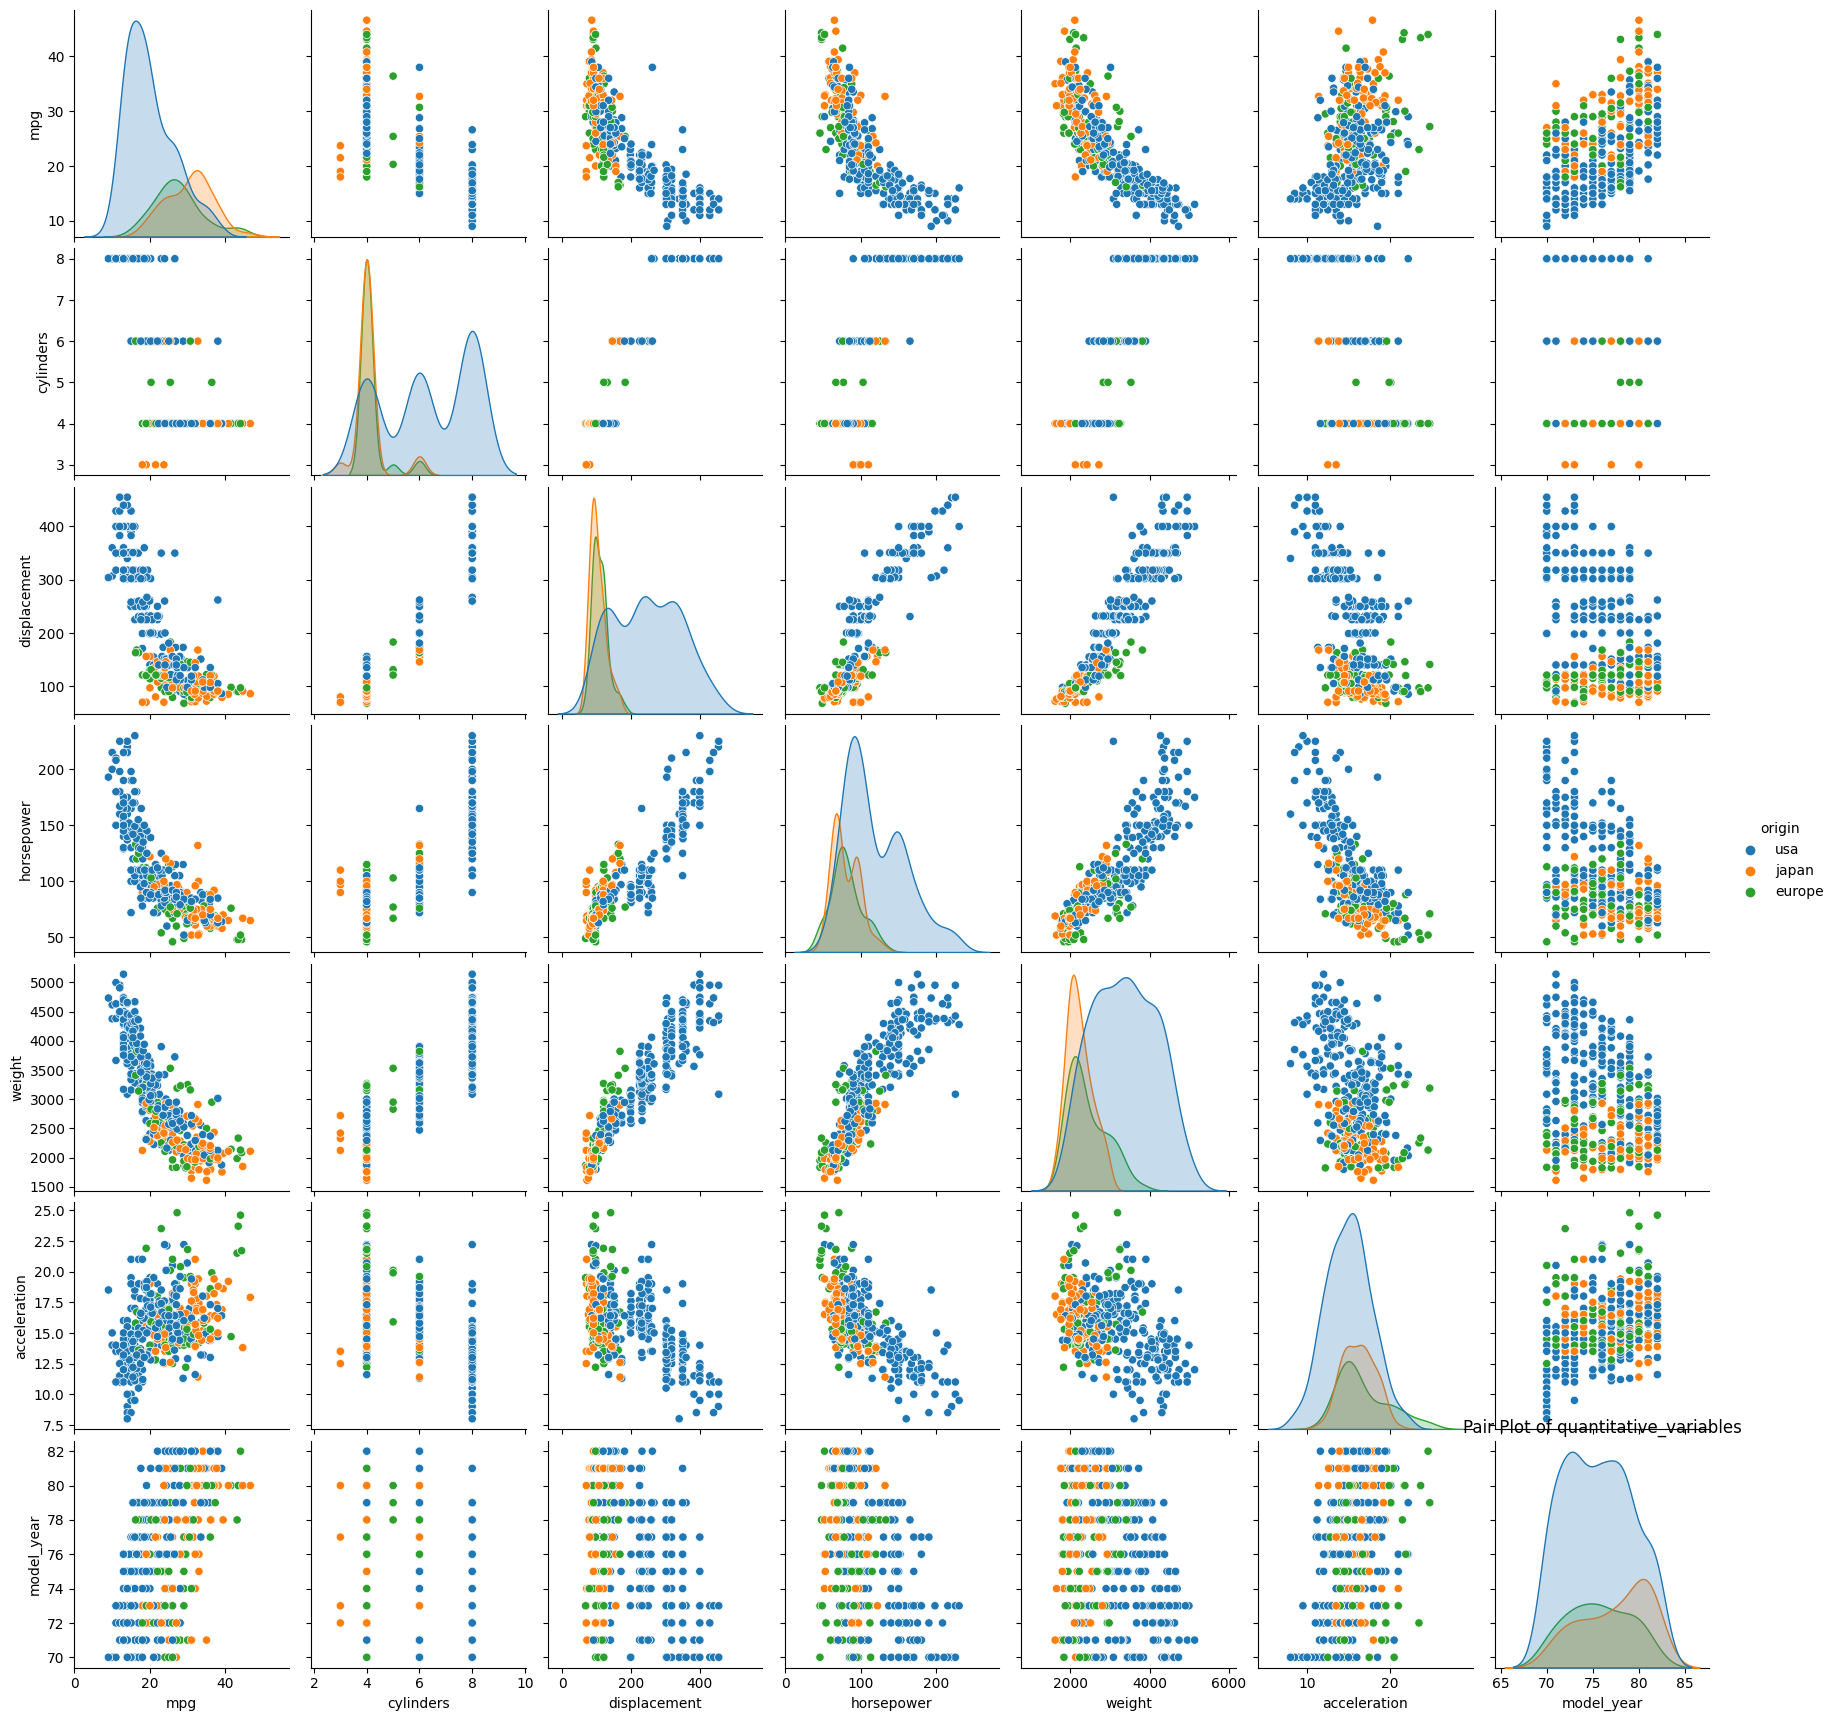

In [42]:
plt.figure(figsize=(9, 9))
corr_matrix = df[quantitative_variables].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
sns.pairplot(df, vars=quantitative_variables, hue='origin')
plt.title('Pair Plot of quantitative_variables')
plt.show()